In [1]:
pip install Pingouin

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
new_df = pd.read_csv('clean_kaggle_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
new_df['Q4'] = new_df['Q4'].fillna('Missing')

## Question 1

In [5]:
import matplotlib.pyplot as plt
new_df['Q1'].value_counts()

25-29    2350
30-34    1979
35-39    1467
22-24    1424
40-44    1042
45-49     771
50-54     536
18-21     498
60-69     309
55-59     301
70+        52
Name: Q1, dtype: int64

In [6]:
new_df['Q3'].value_counts()

India                                                   2353
United States of America                                1484
Other                                                    815
Brazil                                                   443
Japan                                                    385
Russia                                                   351
United Kingdom of Great Britain and Northern Ireland     350
Germany                                                  256
Nigeria                                                  246
Spain                                                    234
Canada                                                   198
France                                                   197
Italy                                                    184
China                                                    166
Turkey                                                   166
Australia                                                147
Mexico                  

In [7]:
new_df['Q4'].value_counts()

Master’s degree                                                      4879
Bachelor’s degree                                                    3013
Doctoral degree                                                      1718
Professional degree                                                   470
Some college/university study without earning a bachelor’s degree     385
I prefer not to answer                                                158
No formal education past high school                                  106
Name: Q4, dtype: int64

In [8]:
new_df['Q6'].value_counts()

3-5 years                    2444
1-2 years                    1908
5-10 years                   1901
10-20 years                  1488
< 1 years                    1281
20+ years                    1146
I have never written code     561
Name: Q6, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

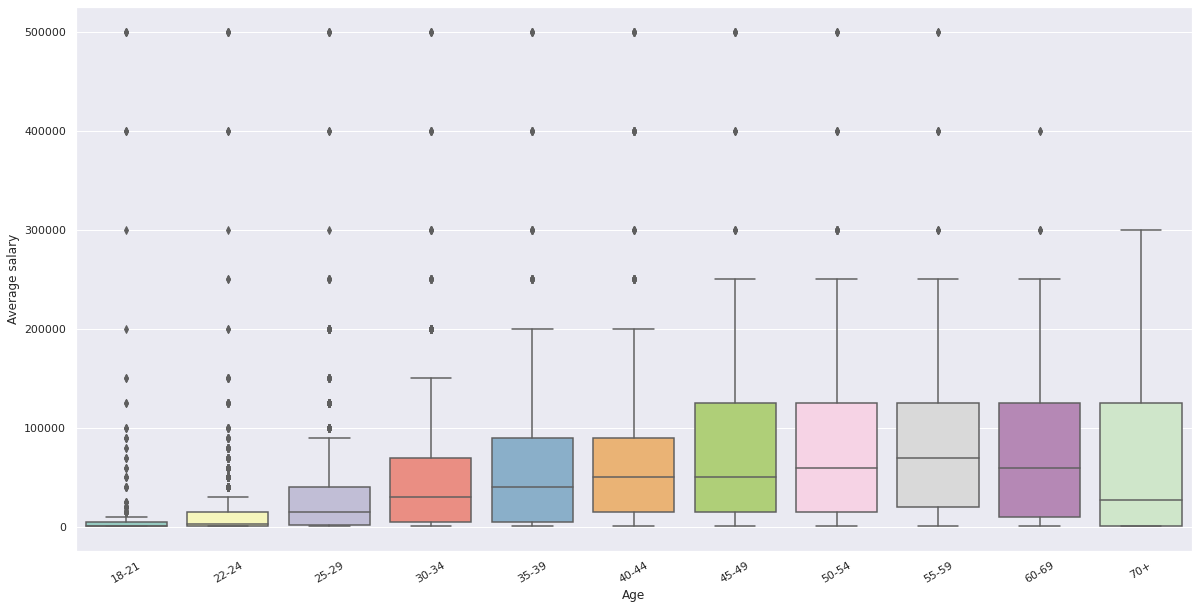

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
order=["18-21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-69","70+"]
sns.boxplot(x='Q1', y='Q24', data=new_df,order = order,palette='Set3').set(xlabel='Age', ylabel='Average salary')
plt.xticks(rotation = 30)

[Text(0, 0.5, 'Average salary'), Text(0.5, 0, 'Programming experience')]

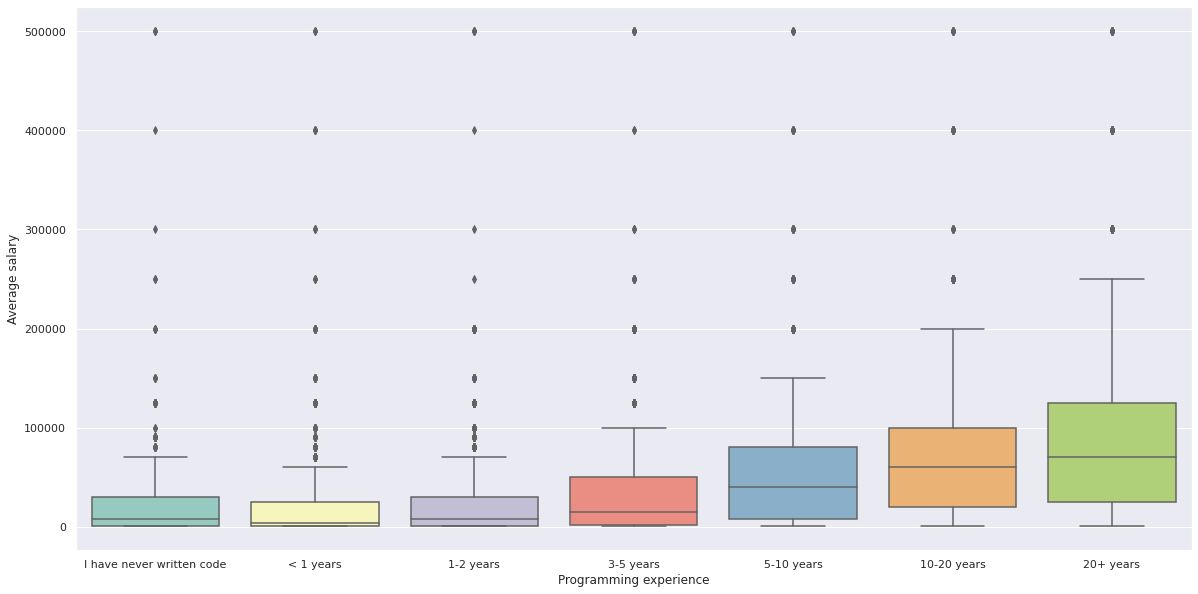

In [10]:
order=["I have never written code","< 1 years","1-2 years","3-5 years","5-10 years","10-20 years","20+ years"]
sns.boxplot(x='Q6', y='Q24', data=new_df,order = order,palette='Set3').set(xlabel='Programming experience', ylabel='Average salary')

In [11]:
language = []
rows,column = new_df.shape
for i in range(rows):
  num_of_language = 0
  for j in range(12):
    if type(new_df['Q7_Part_'+str(j+1)][i]) == str:
      num_of_language += 1
  if type(new_df['Q7_OTHER'][i]) == str:
    num_of_language += 1
  language.append(num_of_language)
new_df['Num_of_language'] = language

In [12]:
new_df['Num_of_language'].value_counts()

2     2939
3     2418
1     2350
4     1239
5      702
0      561
6      315
7      119
8       60
9       17
10       7
12       1
11       1
Name: Num_of_language, dtype: int64

[Text(0, 0.5, 'Average salary'), Text(0.5, 0, 'Number of language used')]

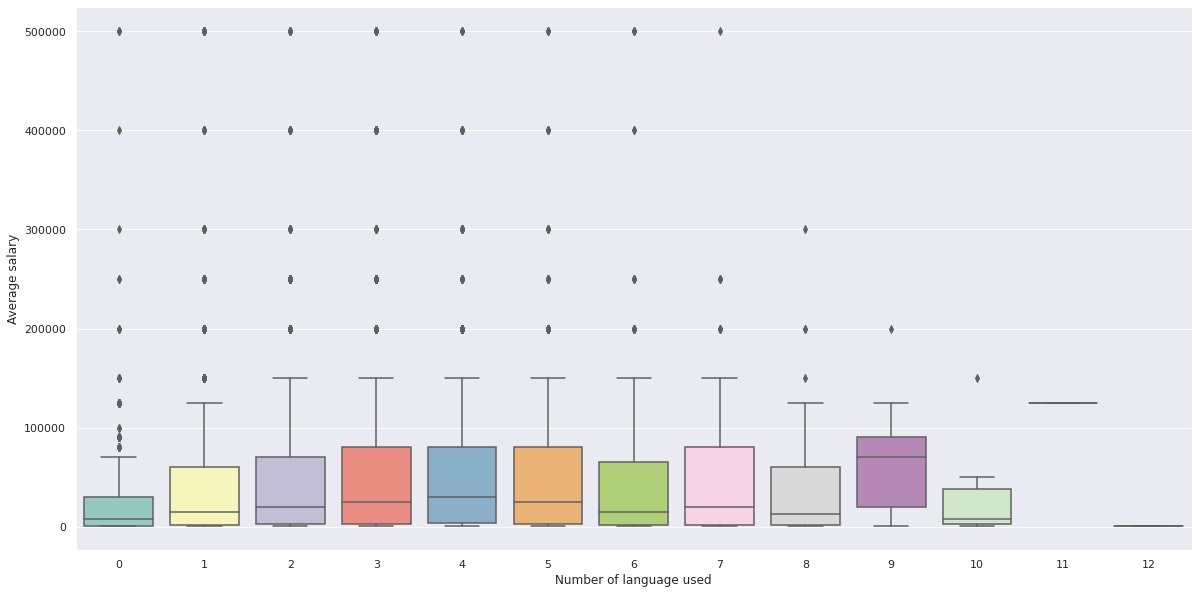

In [13]:
sns.boxplot(x='Num_of_language', y='Q24', data=new_df,palette='Set3').set(xlabel='Number of language used', ylabel='Average salary')

# Question 2

In [14]:
def str_to_float(value):
    if isinstance(value, str):
        if '-' in value:
            temp = value.split('-')
            if ',' in temp[0]:
              new_temp0,new_temp1 = temp[0].split(','),temp[1].split(',')
              final_temp0,final_temp1 = new_temp0[0]+new_temp0[1], new_temp1[0]+new_temp1[1]
              return (float(final_temp0)+float(final_temp1))/2
            else:
              temp[0] = temp[0][1:]
              return (float(temp[0])+float(temp[1]))/2
        if '+' in value:
            a = value.split('+')
            return float(a[0])
        if value != "0":
          value = value[3:]
          value = value.split(',')
          value = value[0]+value[1]
          return float(value)
        else:
          return float(value)
    else:
        return value

In [15]:
new_df['Average_age'] = new_df['Q1'].apply(str_to_float)

In [16]:
gender = []
for item in new_df['Q2']:
  if item == 'Man':
    gender.append(1)
  elif item == 'Woman':
    gender.append(0)
  else:
    gender.append(2)
new_df['New_gender'] = gender

In [17]:
new_df2 = new_df[new_df.New_gender!=2]

In [18]:
Male = new_df2.query('Q2 == "Man"')['Q24']
Female = new_df2.query('Q2 == "Woman"')['Q24']

In [19]:
new_df2.groupby('Q2').describe()

Unnamed: 0                                   ... New_gender               
           count          mean          std   min  ...        25%  50%  75%  max
Q2                                                 ...                          
Man       8872.0  10060.592426  5791.271583   1.0  ...        1.0  1.0  1.0  1.0
Woman     1683.0  10018.087344  5739.572403  20.0  ...        0.0  0.0  0.0  0.0

[2 rows x 48 columns]

[Text(0, 0.5, 'Average salary'), Text(0.5, 0, 'Gender')]

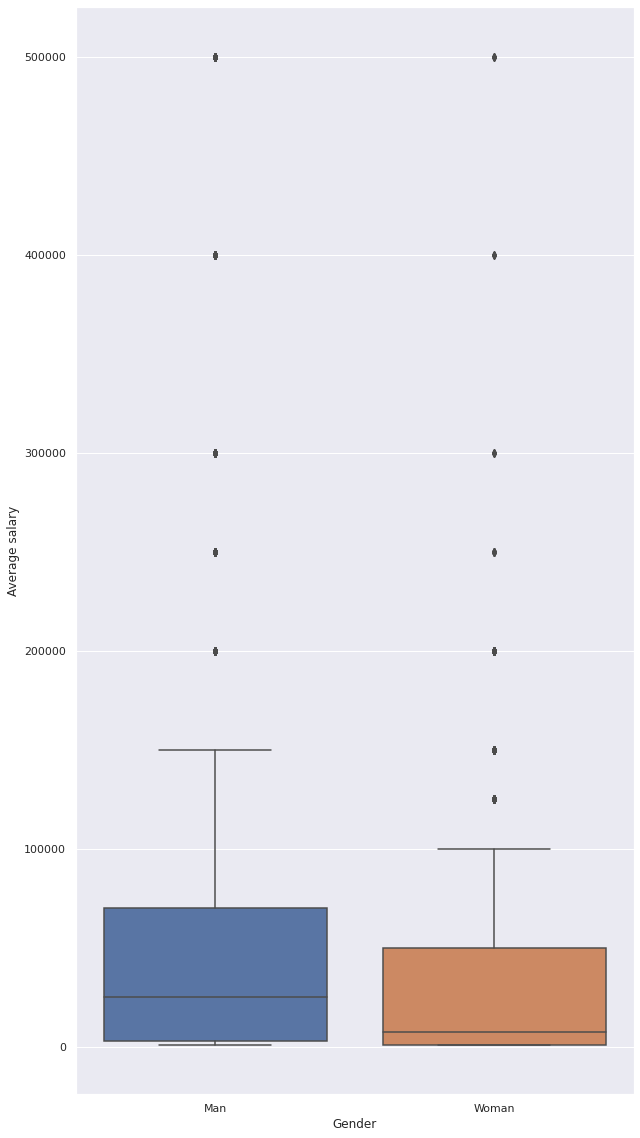

In [21]:
sns.set(rc={'figure.figsize':(10,20)})
sns.boxplot(x='Q2', y='Q24', data=new_df2).set(xlabel='Gender', ylabel='Average salary')


In [22]:
from scipy import stats

In [23]:
stats.shapiro(Male)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7018898725509644, pvalue=0.0)

In [24]:
stats.shapiro(Female)

ShapiroResult(statistic=0.6343148946762085, pvalue=0.0)

In [25]:
#Cant do the ttest due to not normal distribution
#res = stats.ttest_ind(Male, Female,equal_var=True)
#display(res)

In [26]:
replication = 1000
boot_mean_male = []
for i in range(replication):
  boot_male = np.random.choice(Male,replace = True,size = len(Male))
  boot_mean = np.mean(boot_male)
  boot_mean_male.append(boot_mean)
boot_mean_male = pd.DataFrame(boot_mean_male)


boot_mean_female = []
for i in range(replication):
  boot_female = np.random.choice(Female,replace = True,size = len(Female))
  boot_mean1 = np.mean(boot_female)
  boot_mean_female.append(boot_mean1)
boot_mean_female = pd.DataFrame(boot_mean_female)

In [27]:
Compare_salary = pd.concat([pd.DataFrame(boot_mean_male[0].reset_index(drop=True)),pd.DataFrame(boot_mean_female[0].reset_index(drop=True))],axis = 1)
Compare_salary.set_axis(['male_salary','female_salary'],axis = 1,inplace = True)
Compare_salary['Difference'] = Compare_salary['male_salary']-Compare_salary['female_salary']
Compare_salary

,male_salary,female_salary,Difference
0,52424.256087,38146.167558,14278.088529
1,52023.839044,34171.420083,17852.418961
2,50640.216411,37249.554367,13390.662044
3,51624.436429,35806.892454,15817.543975
4,50201.589270,36821.449792,13380.139478
...,...,...,...
995,50290.351668,33414.438503,16875.913165
996,51249.154644,35157.456922,16091.697722
997,50889.314698,36605.466429,14283.848269
998,51947.982417,39364.824718,12583.157699


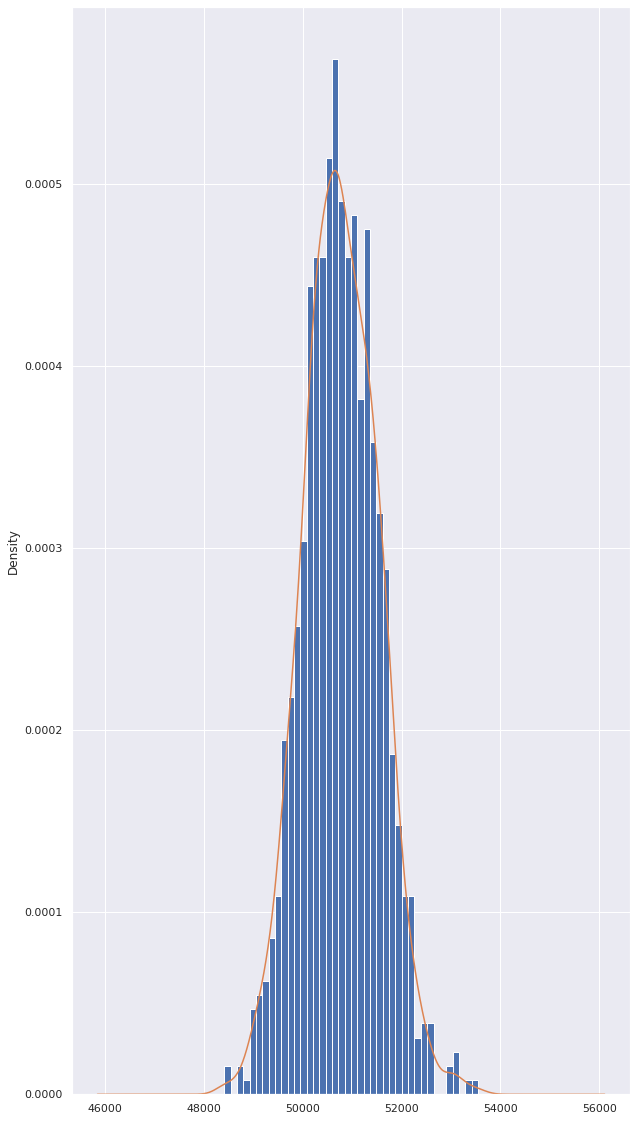

In [28]:
Compare_salary['male_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary['male_salary'].plot.kde(zorder = 2,color = 'C1')

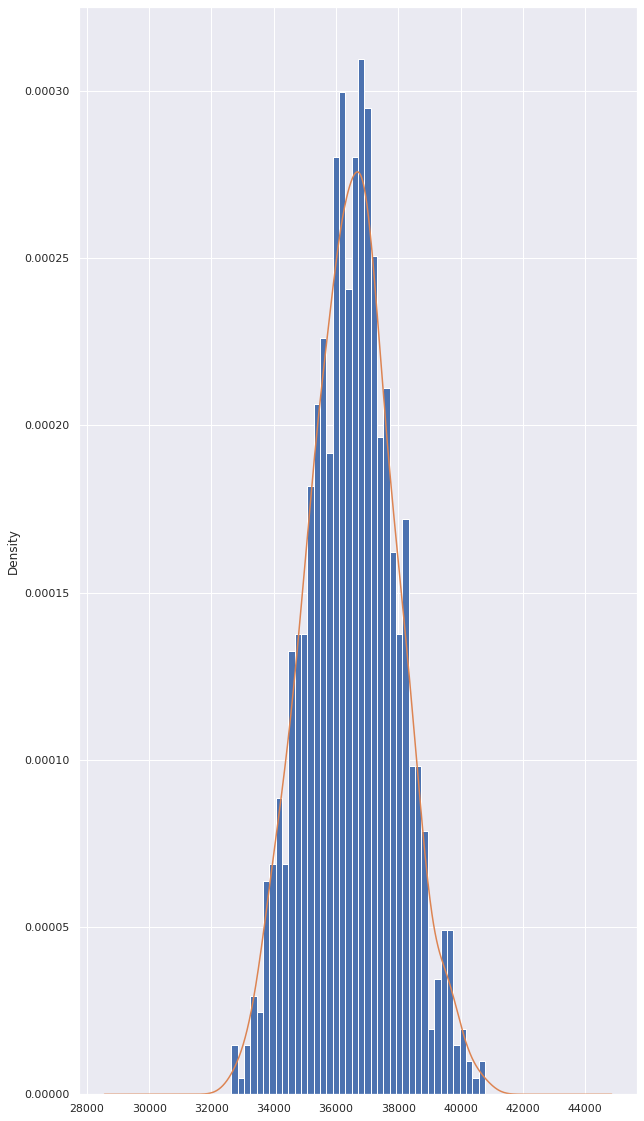

In [29]:
Compare_salary['female_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary['female_salary'].plot.kde(zorder = 2,color = 'C1')

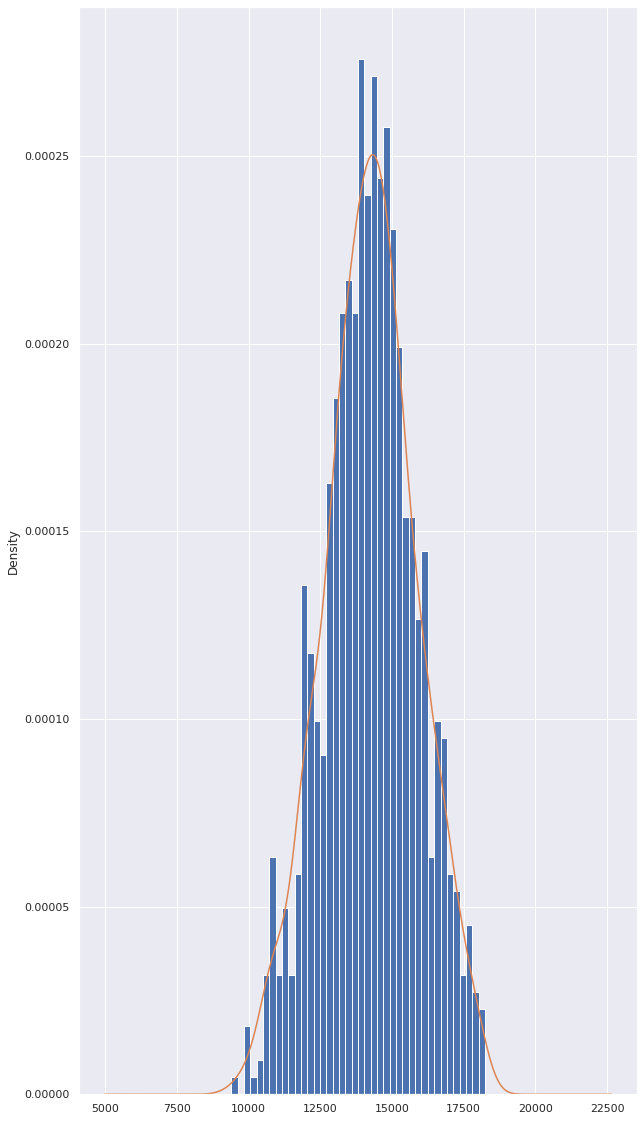

In [30]:
Compare_salary['Difference'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary['Difference'].plot.kde(zorder = 2,color = 'C1')

In [31]:
stats.shapiro(Compare_salary['male_salary'])

ShapiroResult(statistic=0.9982933402061462, pvalue=0.4277012348175049)

In [32]:
stats.shapiro(Compare_salary['female_salary'])

ShapiroResult(statistic=0.9981150031089783, pvalue=0.3341786861419678)

In [33]:
stats.levene(Compare_salary['male_salary'], Compare_salary['female_salary'])

LeveneResult(statistic=307.5425988295271, pvalue=3.733645171635209e-64)

In [34]:
res = stats.ttest_ind(Compare_salary['male_salary'], Compare_salary['female_salary'],equal_var=True)

display(res)

Ttest_indResult(statistic=278.9207631558458, pvalue=0.0)

# Question 3

In [35]:
degree = []
for items in new_df['Q4']:
  if items == "Master’s degree":
    degree.append(1)
  elif items == "Bachelor’s degree":
    degree.append(2)
  elif items == "Doctoral degree":
    degree.append(3)
  else:
    degree.append(0)
new_df['degree'] = degree

In [36]:
new_df['Q4'].value_counts()

Master’s degree                                                      4879
Bachelor’s degree                                                    3013
Doctoral degree                                                      1718
Professional degree                                                   470
Some college/university study without earning a bachelor’s degree     385
I prefer not to answer                                                158
No formal education past high school                                  106
Name: Q4, dtype: int64

In [37]:
new_df3 = new_df[new_df.degree != 0]

In [38]:
Master = new_df3.query('Q4 == "Master’s degree"')['Q24']
Bachelor = new_df3.query('Q4 == "Bachelor’s degree"')['Q24']
Doctoral = new_df3.query('Q4 == "Doctoral degree"')['Q24']

In [39]:
new_df3.groupby('Q4').describe()

Unnamed: 0                             ... degree          
                       count          mean          std  ...    50%  75%  max
Q4                                                       ...                 
Bachelor’s degree     3013.0  10033.975440  5777.534554  ...    2.0  2.0  2.0
Doctoral degree       1718.0   9992.813737  5746.418013  ...    3.0  3.0  3.0
Master’s degree       4879.0  10093.374872  5785.930202  ...    1.0  1.0  1.0

[3 rows x 56 columns]

[Text(0, 0.5, 'Average salary'), Text(0.5, 0, 'Degree')]

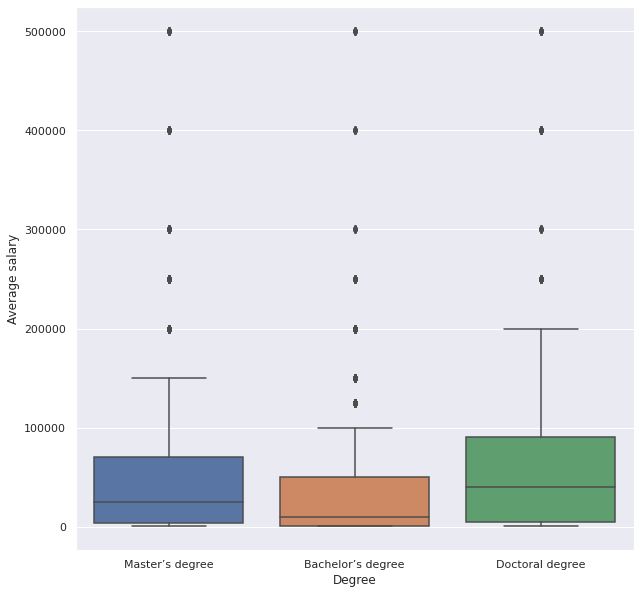

In [40]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x='Q4', y='Q24', data=new_df3).set(xlabel='Degree', ylabel='Average salary')

In [41]:
stats.shapiro(Master)

ShapiroResult(statistic=0.7323943376541138, pvalue=0.0)

In [42]:
stats.shapiro(Bachelor)

ShapiroResult(statistic=0.6054593324661255, pvalue=0.0)

In [43]:
stats.shapiro(Doctoral)

ShapiroResult(statistic=0.7485722899436951, pvalue=2.802596928649634e-45)

In [44]:
import pingouin as pg

In [45]:
#Cant use anova since not normal distribution
#pg.welch_anova(dv='Q24', between='Q4', data=new_df3)

In [46]:
replication = 1000
boot_mean_master = []
for i in range(replication):
  boot_master = np.random.choice(Master,replace = True,size = len(Master))
  boot_mean = np.mean(boot_master)
  boot_mean_master.append(boot_mean)
boot_mean_master = pd.DataFrame(boot_mean_master)


boot_mean_bachelor = []
for i in range(replication):
  boot_bachelor = np.random.choice(Bachelor,replace = True,size = len(Bachelor))
  boot_mean1 = np.mean(boot_bachelor)
  boot_mean_bachelor.append(boot_mean1)
boot_mean_bachelor = pd.DataFrame(boot_mean_bachelor)


boot_mean_doctoral = []
for i in range(replication):
  boot_doctoral = np.random.choice(Doctoral,replace = True,size = len(Doctoral))
  boot_mean2 = np.mean(boot_doctoral)
  boot_mean_doctoral.append(boot_mean2)
boot_mean_doctoral = pd.DataFrame(boot_mean_doctoral)

In [47]:
Compare_salary1 = pd.concat([pd.DataFrame(boot_mean_master[0].reset_index(drop=True)),pd.DataFrame(boot_mean_bachelor[0].reset_index(drop=True)),pd.DataFrame(boot_mean_doctoral[0].reset_index(drop=True))],axis = 1)
Compare_salary1.set_axis(['master_salary','bachelor_salary','doctor_salary'],axis = 1,inplace = True)
Compare_salary1['DifferenceBM'] = Compare_salary1['master_salary']-Compare_salary1['bachelor_salary']
Compare_salary1['DifferenceDM'] = Compare_salary1['doctor_salary']-Compare_salary1['master_salary']
Compare_salary1['DifferenceBD'] = Compare_salary1['doctor_salary']-Compare_salary1['bachelor_salary']
Compare_salary1

,master_salary,bachelor_salary,doctor_salary,DifferenceBM,DifferenceDM,DifferenceBD
0,53100.430416,34297.378029,68469.732247,18803.052388,15369.301831,34172.354218
1,52572.145932,36888.649187,68307.916182,15683.496745,15735.770250,31419.266995
2,51303.955729,35277.962164,71113.504075,16025.993565,19809.548346,35835.541911
3,51613.547858,34797.709924,67499.708964,16815.837935,15886.161106,32701.999040
4,52052.162328,33799.535347,73877.182771,18252.626982,21825.020442,40077.647424
...,...,...,...,...,...,...
995,53683.439229,34588.284102,68630.966240,19095.155127,14947.527010,34042.682138
996,51406.640705,34691.337537,66825.669383,16715.303168,15419.028678,32134.331846
997,50689.690510,35307.832725,68108.265425,15381.857785,17418.574915,32800.432700
998,52774.236524,36168.104879,65102.735739,16606.131645,12328.499215,28934.630860


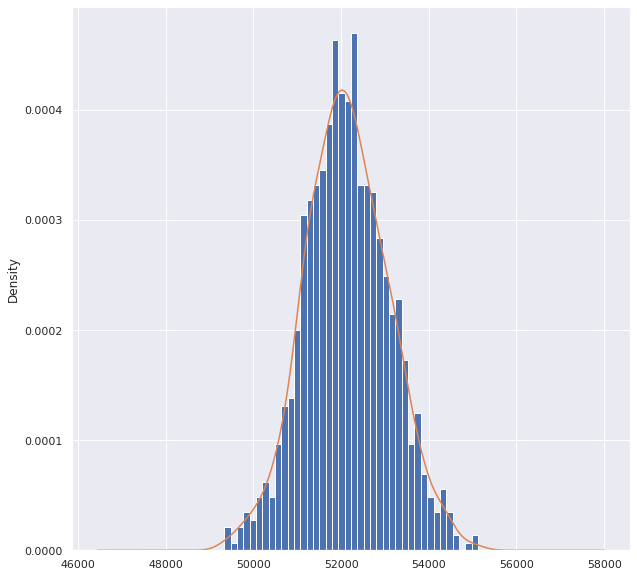

In [48]:
Compare_salary1['master_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary1['master_salary'].plot.kde(zorder = 2,color = 'C1')

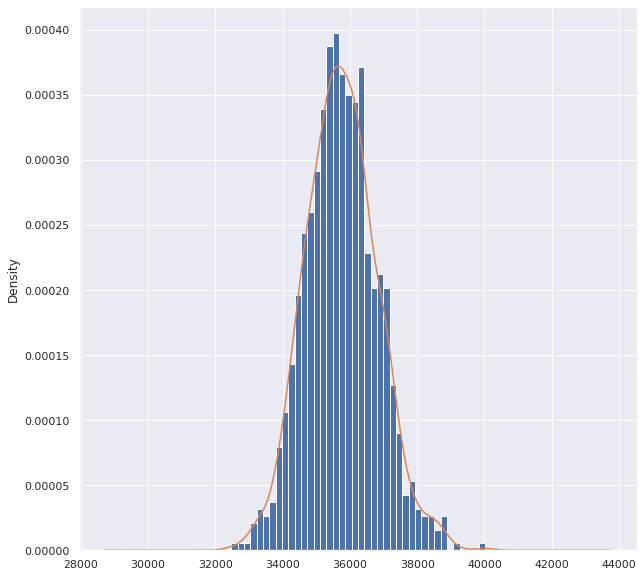

In [49]:
Compare_salary1['bachelor_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary1['bachelor_salary'].plot.kde(zorder = 2,color = 'C1')

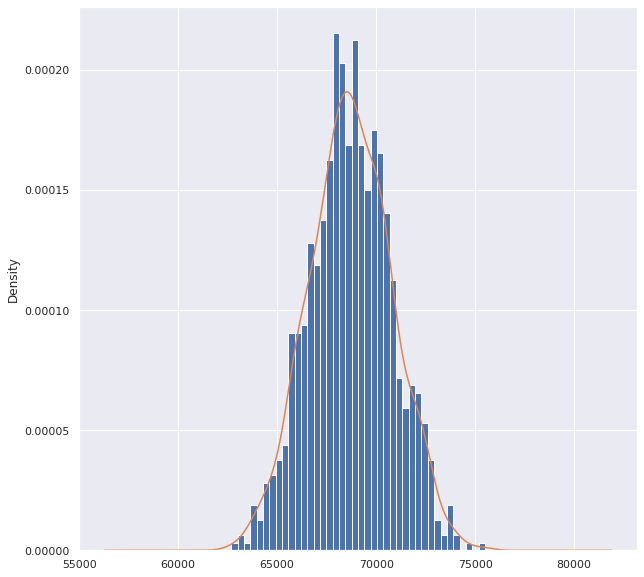

In [50]:
Compare_salary1['doctor_salary'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary1['doctor_salary'].plot.kde(zorder = 2,color = 'C1')

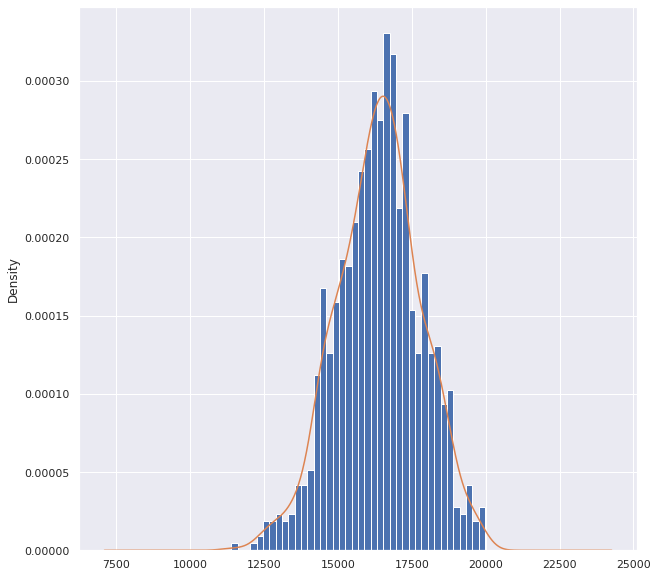

In [51]:
Compare_salary1['DifferenceBM'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary1['DifferenceBM'].plot.kde(zorder = 2,color = 'C1')

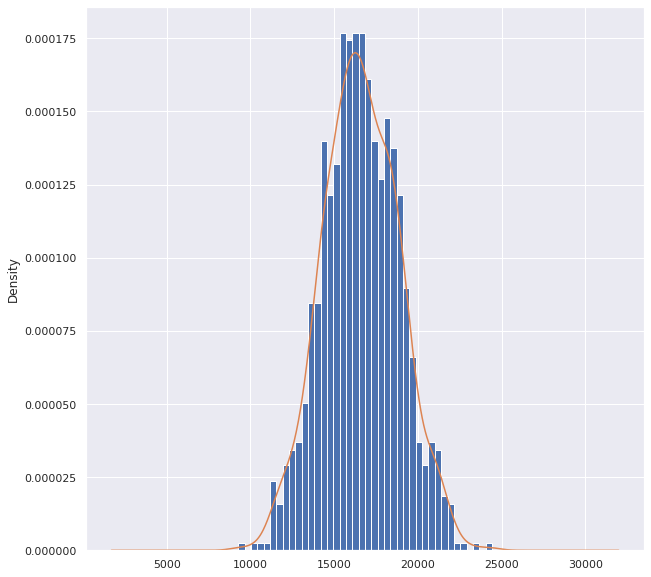

In [52]:
Compare_salary1['DifferenceDM'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary1['DifferenceDM'].plot.kde(zorder = 2,color = 'C1')

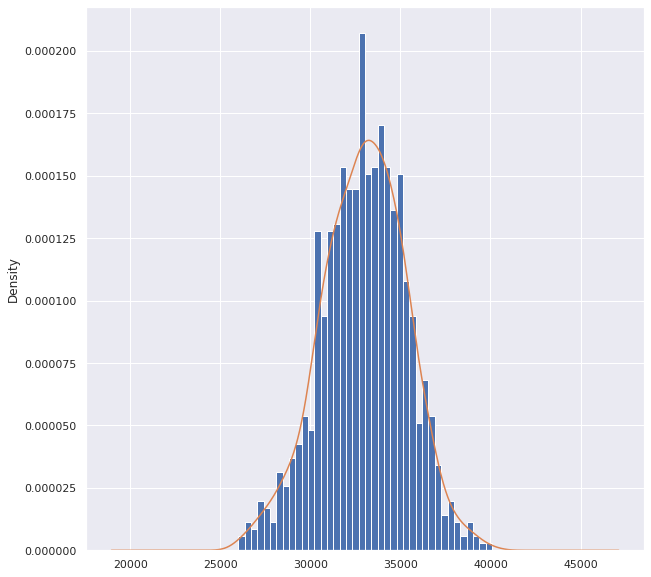

In [53]:
Compare_salary1['DifferenceBD'].plot(kind = 'hist',rot = 0,bins = 40,density = True)
Compare_salary1['DifferenceBD'].plot.kde(zorder = 2,color = 'C1')

In [55]:
bootstrap = pd.concat([pd.DataFrame(boot_mean_master[0].reset_index(drop=True)),pd.DataFrame(boot_mean_bachelor[0].reset_index(drop=True)),pd.DataFrame(boot_mean_doctoral[0].reset_index(drop=True))])
bootstrap.set_axis(['salary'],axis = 1,inplace = True)
Degree = []
for i in range(1000):
  Degree.append('Master')
for i in range(1000):
  Degree.append('bachelor')
for i in range(1000):
  Degree.append('Doctor')
bootstrap['degree'] = Degree
bootstrap

,salary,degree
0,53100.430416,Master
1,52572.145932,Master
2,51303.955729,Master
3,51613.547858,Master
4,52052.162328,Master
...,...,...
995,68630.966240,Doctor
996,66825.669383,Doctor
997,68108.265425,Doctor
998,65102.735739,Doctor


In [56]:
pg.welch_anova(dv='salary', between='degree', data=bootstrap)

,Source,ddof1,ddof2,F,p-unc,np2
0,degree,2,1881.580588,125967.846517,0.0,0.988566
